# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:

# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

In [2]:
!pip install light-the-torch >> /.tmp
!ltt install torch torchvision >> /.tmp
!pip install fastai --upgrade >> /.tmp

In [3]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [4]:
# Create the data parameters
weight = 0.3
bias = 0.9
# Make X and y using linear regression feature
start = 0
end = 1
step = 0.01

# Create x and y (features and labels)
X =  torch.arange(start, end,step).unsqueeze(dim=1) # Without unsqueeze, errors will pop up
y= weight*X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [5]:
# Split the data into training and testing
train_split = int(0.8*len(X))

X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label= "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions")
  #show the legend
  plt.legend(prop={"size": 14});

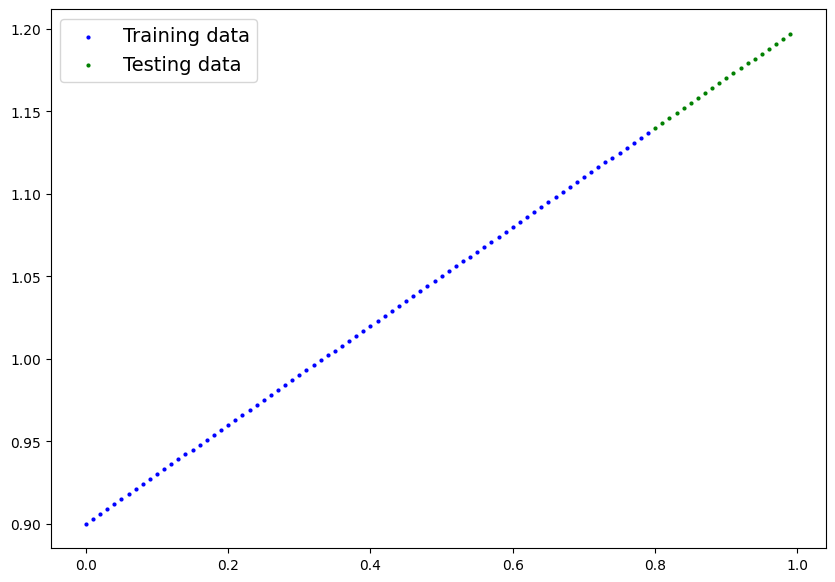

In [7]:
# Plot the training and testing data
plot_predictions(X_train,y_train, X_test, y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [8]:
# Create PyTorch linear regression model by subclassing nn.Module
from torch import nn
class LinearRegressionModel(nn.Module): #<-- almost everything in PyTorch inherits from nn.Module, here LinearRegressionModel is being inheritted from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #<- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, #<- can this parameter be updated via gradient descent?
                                            dtype= torch.float # PyTorch loves the datatype torch.float32
                                            ))
    #we dont necessarily set to--> requires_grad = True
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype= torch.float))
    #use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layer, dense layer
    #self.linear_layer = nn.Linear(in_features=1,out_features=1)

  # forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: #<- "x" is the input data
    return self.weights*x + self.bias # this is the linear regression formula

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [12]:
# Instantiate the model and put it to the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [13]:
# Create the loss function and optimizer
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimier
optimizer = torch.optim.SGD(params= model_1.parameters(),lr=0.01)


In [14]:
# Training loop
torch.manual_seed(42)
# Train model for 300 epochs
epochs =200

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # Put model in train mode
  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()
  ### Testing
  # model_1.eval()
  # with torch.inference_mode():

    # test_pred = model_1(X_test)

    # test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
      model_1.eval()
      with torch.inference_mode():
      # 1. Forward pass
        test_pred = model_1(X_test)
      # 2. Calculate test loss
        test_loss = loss_fn(test_pred, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [15]:
# Make predictions with the model
with torch.inference_mode():
  y_preds_new = model_1(X_test)
y_preds_new

tensor([[1.1612],
        [1.1648],
        [1.1683],
        [1.1719],
        [1.1755],
        [1.1790],
        [1.1826],
        [1.1862],
        [1.1897],
        [1.1933],
        [1.1968],
        [1.2004],
        [1.2040],
        [1.2075],
        [1.2111],
        [1.2146],
        [1.2182],
        [1.2218],
        [1.2253],
        [1.2289]])

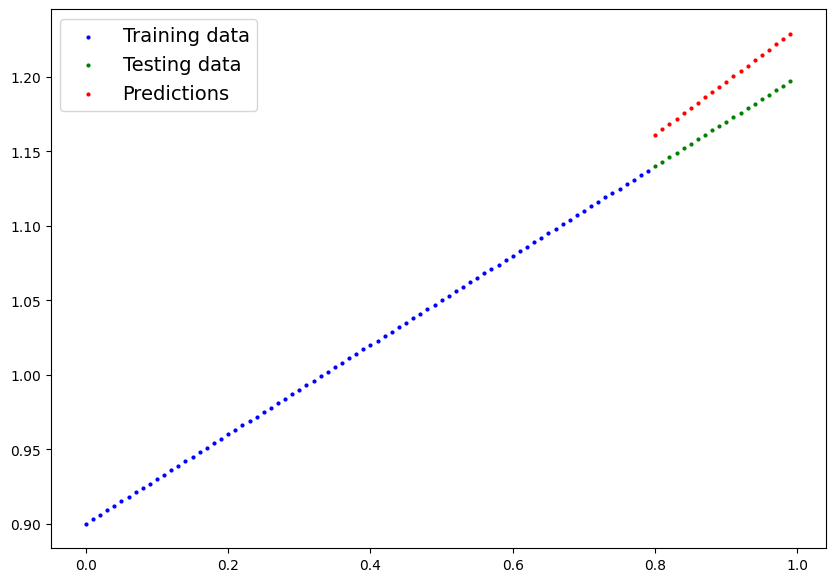

In [16]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions = y_preds_new)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [21]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [24]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
print(f"Parameter of model_1: {model_1.state_dict()}")

# Load a PyTorch model
# Create a new instance of linear regression
loaded_model_1 = LinearRegressionModel()


# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

Parameter of model_1: OrderedDict([('weights', tensor([0.3561])), ('bias', tensor([0.8763]))])


LinearRegressionModel()

In [20]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [23]:
loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.3561])), ('bias', tensor([0.8763]))])

In [25]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
  y_preds = model_1(X_test)


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [26]:
# Make predictions with loaded model and compare them to the previous
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])